### Задание 1 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = boston.data

In [7]:
target = boston.target

In [8]:
feature_names = boston.feature_names

In [9]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
X = pd.DataFrame(data, columns = feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
y = pd.DataFrame(target, columns = ['price'])
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## Разбиваем на тренировочные и тестовые датафреймы

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

### Масштабируем:

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
stndrd = StandardScaler()

In [35]:
X_train_scaled = pd.DataFrame(stndrd.fit_transform(X_train), columns = X_train.columns)

### Строим модель TSNE:

In [37]:
from sklearn.manifold import TSNE

In [38]:
TSNE = TSNE(n_components = 2, learning_rate = 250, random_state = 42) 

In [40]:
X_train_tsne = TSNE.fit_transform(X_train_scaled)

In [41]:
X_train_scaled.shape

(404, 13)

In [42]:
X_train_tsne.shape

(404, 2)

### Построение диаграммы рассеяния данных:

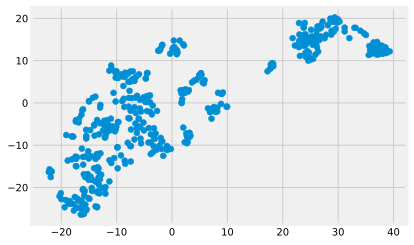

In [52]:
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])


### Задание 2

### Разбиваем данные на три кластера:

In [54]:
from sklearn.cluster import KMeans

In [55]:
model = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [56]:
labels_train = model.fit_predict(X_train_scaled)

### Строим еще раз диагрумму рассеяния:

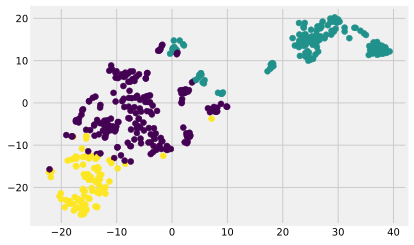

In [58]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

### Вычисляем средние значения price и CRIM в разных кластерах:

In [63]:
print ('Средние значения price:')
print ('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print ('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print ('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Средние значения price: 
Кластер 0: price    24.958115
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    27.788372
dtype: float64


In [69]:
print ('Средние значения CRIM: ')
print('Кластер 0: {}'.format(X_train.loc[labels_train ==0].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train ==1].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train ==2].mean()))

Средние значения CRIM: 
Кластер 0: CRIM         0.421660
ZN           3.044503
INDUS        8.967749
CHAS         0.068063
NOX          0.525791
RM           6.400094
AGE         70.642408
DIS          3.651640
RAD          4.549738
TAX        302.931937
PTRATIO     18.028796
B          381.651466
LSTAT       10.854188
dtype: float64
Кластер 1: CRIM        10.797028
ZN           0.000000
INDUS       18.759449
CHAS         0.094488
NOX          0.691134
RM           5.964008
AGE         90.340945
DIS          1.982317
RAD         20.015748
TAX        621.842520
PTRATIO     19.662205
B          296.165118
LSTAT       18.850315
dtype: float64
Кластер 2: CRIM         0.073566
ZN          47.587209
INDUS        3.984535
CHAS         0.046512
NOX          0.425809
RM           6.648523
AGE         31.753488
DIS          6.852247
RAD          4.290698
TAX        306.918605
PTRATIO     16.976744
B          388.698256
LSTAT        6.577093
dtype: float64
